<a href="https://colab.research.google.com/github/karthikm15/Semi-Supervised-GANs-For-Melanoma-Detection/blob/main/Setting_Up_An_Image_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import torchvision
import torchvision.transforms as transforms

import os

import tensorflow as tf
import tensorflow.strings
from PIL import Image

if torch.cuda.is_available():
   print("Your Colab notebook is configured to run on the GPU!")
else:
   print("If you see this message, your Colab notebook is currently running on the CPU. Click the Runtime dropdown menu, select Change runtime type, and  choose GPU in the list of Hardware accelerators")

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Your Colab notebook is configured to run on the GPU!


In [99]:
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

# directory, label = next(iter(labeled_loader))
import cv2 # import opencv

# # load image 
# image = cv2.imread(directory[0])

# resized_img = cv2.resize(image, (100, 100), interpolation = cv2.INTER_AREA)
# plt.imshow(resized_img) 

class ImageUnlabeled(torch.utils.data.Dataset):
  def __init__(self, dir_path, transform=None):
    self.dir_path = dir_path
    self.transform = transform
  def __len__(self):
    path, dirs, files = next(os.walk(self.dir_path))
    file_count = len(files)
    return file_count
  def __getitem__(self, i):
    string = tf.strings.as_string(i).numpy()
    string = string.decode()

    file_path = self.dir_path + "/" +str(string)+"_"

    if (os.path.isfile(file_path+"0"+".jpg")):
      file_path += "0.jpg"
    elif (os.path.isfile(file_path+"1"+".jpg")):
      file_path += "1.jpg"

    if (os.path.isfile(file_path)):
      if self.transform:
          image = Image.open(file_path)
          image = self.transform(image)
          return(np.array(image), str(string))
      else:
        image = Image.open(file_path)
        return (np.array(image), str(string))
    else:
      return ("Error", str(string))

  
class ImageLabeled(torch.utils.data.Dataset):
  def __init__(self, dir_path, transform=None):
    self.dir_path = dir_path
    self.transform = transform
  def __len__(self):
    path, dirs, files = next(os.walk(self.dir_path))
    file_count = len(files)
    return file_count
  def __getitem__(self, i):
    string = tf.strings.as_string(i).numpy()
    string = string.decode()

    file_path = self.dir_path + "/" +str(string)+"_"

    if (os.path.isfile(file_path+"0"+".jpg")):
      file_path += "0.jpg"
    elif (os.path.isfile(file_path+"1"+".jpg")):
      file_path += "1.jpg"

    if (os.path.isfile(file_path)):
      if self.transform:
          image = Image.open(file_path)
          image = self.transform(image)
          return(np.array(image), str(string))
      else:
        image = Image.open(file_path)
        return (np.array(image), str(string))
    else:
      return ("Error", str(string))


unlabeled_data = ImageUnlabeled('./unlabeled', transforms.Compose([transforms.Scale(10),
              transforms.Resize(250)]))
labeled_data = ImageLabeled('./labeled', transforms.Compose([transforms.Scale(10),
              transforms.Resize(250)]))

unlabeled_loader = DataLoader(unlabeled_data, shuffle = True, persistent_workers=False)
labeled_loader = DataLoader(labeled_data, shuffle = True, persistent_workers=False)

# For unlabeled data (1 batch):
print(next(iter(unlabeled_loader)))

# For labeled data (1 batch):
print(next(iter(labeled_loader)))

[('Error',), ('264',)]
[tensor([[[[188, 165, 173],
          [188, 165, 173],
          [188, 165, 173],
          ...,
          [184, 156, 152],
          [184, 156, 152],
          [184, 156, 152]],

         [[188, 165, 173],
          [188, 165, 173],
          [188, 165, 173],
          ...,
          [184, 156, 152],
          [184, 156, 152],
          [184, 156, 152]],

         [[188, 165, 173],
          [188, 165, 173],
          [188, 165, 173],
          ...,
          [184, 156, 152],
          [184, 156, 152],
          [184, 156, 152]],

         ...,

         [[176, 148, 143],
          [176, 148, 143],
          [176, 148, 143],
          ...,
          [192, 164, 175],
          [192, 164, 175],
          [192, 164, 175]],

         [[176, 148, 143],
          [176, 148, 143],
          [176, 148, 143],
          ...,
          [192, 164, 175],
          [192, 164, 175],
          [192, 164, 175]],

         [[176, 148, 143],
          [176, 148, 143],
          [1

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:280: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


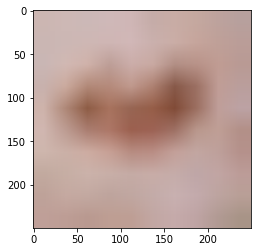

In [103]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time
import cv2 # import opencv

image, label = next(iter(labeled_loader))

plt.imshow(image[0]) 